#### [CNN Fashion MNIST MODEL]

[1] 모듈 로딩 및 데이터 준비 <hr>

In [21]:
## 모듈 로딩
import torch									## Tensor 및 기본 함수들 관련 모듈
import torch.nn as nn							## 인공신경망 관련 모듈
import torch.nn.functional as F                 ## 인공신경망 관련 함수들

from torchvision.datasets import FashionMNIST	## 비전관련 내장 데이터셋 모듈
from torch.utils.data import DataLoader			## Pytorch의 데이터셋 관련 모듈

import torchvision.transforms as transforms		## 비전관련 이미지 증상/변환 관련 모듈

import matplotlib.pyplot as plt					## 이미지 시각화

In [22]:
## 이미지 관련 준비
IMG_ROOT = '../data/image/'							## 이미지 데이터 저장 폴더 경로

[2] 데이터 로딩 <hr>

In [23]:
trainDS = FashionMNIST(root=IMG_ROOT,
			 download=True,
			 train=True,
			 transform=transforms.ToTensor())

In [24]:
testDS = FashionMNIST(root=IMG_ROOT,
			 download=True,
			 train=False,
			 transform=transforms.ToTensor())

In [25]:
## 데이터셋 체크
## - 타입
print(f'type		 : {type(testDS)}\n')

## - 속성 : 클래스 정보
print(f'classes		 : {testDS.classes}\n')
print(f'class_to_idx : {testDS.class_to_idx}')

type		 : <class 'torchvision.datasets.mnist.FashionMNIST'>

classes		 : ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

class_to_idx : {'T-shirt/top': 0, 'Trouser': 1, 'Pullover': 2, 'Dress': 3, 'Coat': 4, 'Sandal': 5, 'Shirt': 6, 'Sneaker': 7, 'Bag': 8, 'Ankle boot': 9}


In [26]:
## - 속성 : 데이터와 타겟
print(f'targets		: {testDS.targets}\n')
print(f'data		: {testDS.data.shape}\n')

targets		: tensor([9, 2, 1,  ..., 8, 1, 5])

data		: torch.Size([10000, 28, 28])



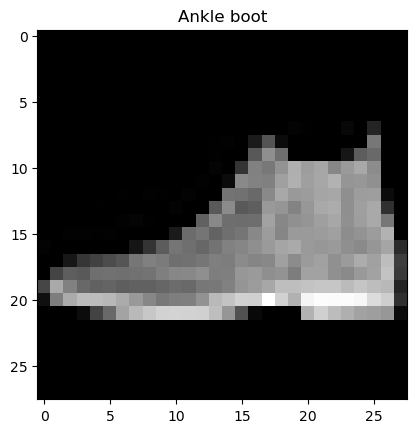

In [27]:
## 이미지 데이터와 타겟 확인
idx_to_classes = {v:k for k, v in testDS.class_to_idx.items()}

plt.imshow(testDS.data[0], cmap='gray')
plt.title(idx_to_classes[testDS.targets[0].item()])
plt.show()

In [28]:
## 로우 데이터 확인
print(f'Raw Image Data : {testDS.data[0].min()}, {testDS.data[0].max()}')

Raw Image Data : 0, 255


[3] 모델 정의 및 설계 <hr>

In [54]:
# 모델 클래스 설계 ----------------------------------------------------------------------
## 회귀용 커스텀 모델 
## 클래스이름 : FashionDNN
## 부모클래스 : nn.Module
## 모델층구성   입력신호/피쳐수       출력신호수/퍼셉트론수       활성화함수
## - 입력층  :     784                     300                 ReLu
## - 은닉층  :     300                     100                 ReLu 
## - 출력층  :     100                      10                 Softmax => 손실함수 내 포함
## - -----------------------------------------------------------------------------------
class FashionDNN(nn.Module):
    def __init__(self):
        super(FashionDNN, self).__init__()
        self.fc1 = nn.Linear(in_features=784, out_features=300)
        self.fc2 = nn.Linear(in_features=300, out_features=100)
        self.fc3 = nn.Linear(in_features=100, out_features=10)
        self.dropout = nn.Dropout(p=0.25)  # 선택적: 과적합 방지용

    def forward(self, input_data):
        print(f'input_data shape : {input_data.shape}')  # [batch, 28, 28]
        out = input_data.view(-1, 784)  # Flatten
        out = F.relu(self.fc1(out))
        out = self.dropout(out)
        print(f'1. out shape : {out.shape}')  # [batch, 300]
        
        out = F.relu(self.fc2(out))
        print(f'2. out shape : {out.shape}')  # [batch, 100]

        out = self.fc3(out)
        print(f'3. out shape : {out.shape}')  # [batch, 10]
        return out

In [55]:
m1 = FashionDNN()

In [56]:
## DNN모델에 이미지 테스트
testImg = trainDS.data[0:2].float()
pre=m1(testImg)
pre, trainDS.targets[0:2]

input_data shape : torch.Size([2, 28, 28])
1. out shape : torch.Size([2, 300])
2. out shape : torch.Size([2, 100])
3. out shape : torch.Size([2, 10])


(tensor([[  0.7843,  11.8864,  -3.5083,  30.1141,   3.4936, -24.0925,  21.3682,
           -9.8703,  -8.6447,  13.6415],
         [-21.2672,   7.7556,  -2.0779,  13.4810,  -5.6687,  11.4206,  14.9810,
           15.3254,  19.0366,  26.0148]], grad_fn=<AddmmBackward0>),
 tensor([9, 0]))

In [ ]:
## 모델 이미지 적용 후 

In [ ]:
# 모델 클래스 설계 ----------------------------------------------------------------------
## 회귀용 커스텀 모델 
## 클래스이름 : FashionCNN
## 부모클래스 : nn.Module
## 모델층구성   입력신호/피쳐수       출력신호수/퍼셉트론수       활성화함수
## - 입력층  :     784                     300                 ReLu
## - 은닉층  :     300                     100                 ReLu 
## - 출력층  :     100                      10                 Softmax => 손실함수 내 포함
## - -----------------------------------------------------------------------------------
class FashionCNN(nn.Module):
	def __init__(self):
		super(FashionCNN, self).__init__()
		## 특징맵 추출 부분
		self.con_layer1 = nn.Conv2d(1, 1, 3)	## ( 1, 28, 28) ==> ( 1, 26, 26)
		self.fool_layer1 = nn.MaxPool2d(2, 2)	## ( 1, 26, 26) ==> ( 1, 13, 13)
		self.flat_layer1 = nn.Flatten()			## ( 1, 13, 13) ==> ( 1, 1*13*13)

		## 전결합 학습 부분
		self.fc_layer1 = nn.Linear(169, 30)
		self.out_layer = nn.Linear(30, 10)

In [39]:
m2 = FashionCNN()

In [41]:
## CNN모델에 이미지 테스트
testImg2 = trainDS.data[0:2].unsqueeze(1).float()
pre=m2(testImg2)
pre, trainDS.targets[0:2]

c:\Users\KDP-35\anaconda3\envs\DL_TORCH\lib\site-packages\torch\nn\functional.py:1374: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)


(tensor([[-0.4587,  0.0415,  0.1785,  0.2803,  0.0050,  0.2099,  0.3089, -0.3083,
          -0.2112, -0.1621],
         [-0.4675,  0.0695, -0.0703, -0.4119,  0.2742,  0.0220, -0.1120, -0.0570,
          -0.0387,  0.5199]], grad_fn=<AddmmBackward0>),
 tensor([9, 0]))

[4] 학습 준비 <hr>

In [33]:
## 학습 관련 설정
EPOCHS = 10
BATCH_SIZE = 100
T_ITERATION = int(trainDS.data.shape[0]/BATCH_SIZE)
LR = 0.001
DEVICE = 'gpu' if torch.cuda.is_available() else 'cpu'

print(f'EPOCHS:{EPOCHS}, BATCH_SIZE:{BATCH_SIZE}, T_ITERATION:{T_ITERATION}')

EPOCHS:10, BATCH_SIZE:100, T_ITERATION:600


In [34]:
learning_rate = 0.001
model = FashionCNN()
model.to(DEVICE)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
print(model)

FashionCNN(
  (layer1): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc1): Linear(in_features=2304, out_features=600, bias=True)
  (drop): Dropout2d(p=0.25, inplace=False)
  (fc2): Linear(in_features=600, out_features=100, bias=True)
  (fc3): Linear(in_features=100, out_features=10, bias=True)
)
